In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# The Secretary Problem (Optimal Stopping Problem)

This notebook explores the famous **secretary problem**, a classic problem in optimal stopping theory.

## The Problem

Imagine you need to hire a secretary from 100 candidates. The candidates arrive sequentially, and you must:
- Interview them one at a time in random order
- Immediately accept or reject each candidate (no callbacks)
- Cannot compare candidates you haven't seen yet

**Goal:** Maximize the probability of selecting the best candidate.

## The Optimal Strategy

The solution is to:
1. **Reject the first n candidates** (the "sampling phase") and note the best quality among them
2. **Select the first subsequent candidate** who is better than all candidates in the sampling phase

## Key Question

What value of n maximizes your chance of selecting the best candidate?

**Theoretical answer:** n ≈ N/e ≈ 37% of all candidates, which gives a success probability of approximately 1/e ≈ 37%.

In [2]:
def sample(n, x):
    bar, best = np.max(x[:n]), np.max(x)
    for i in range(n, len(x)):
        if x[i] > bar:
            break
    return np.array([n, i, x[i], best, x[i]/best])

In [3]:
N = 100
trials = 8000

In [4]:
data = np.zeros([trials*(N-1), 5])
for t in range(trials):
    secretaries = np.random.normal(0,1,N)
    for i in range(0, N-1):
        data[t*(N-1) + i] = sample(i+1, secretaries)

In [5]:
df = pd.DataFrame(data, columns=["sample", "index", "quality", "best", "fraction_best"])
df.describe()

,sample,index,quality,best,fraction_best
count,792000.000000,792000.000000,792000.000000,792000.000000,792000.000000
mean,50.000000,74.651051,1.063061,2.509849,0.425309
std,28.577398,31.720953,1.347451,0.436780,0.536099
min,1.000000,1.000000,-3.562057,1.269828,-2.039829
25%,25.000000,50.000000,-0.005099,2.196532,-0.002144
50%,50.000000,99.000000,1.312040,2.460468,0.530375
75%,75.000000,99.000000,2.166879,2.772825,1.000000
max,99.000000,99.000000,4.892210,4.892210,1.000000


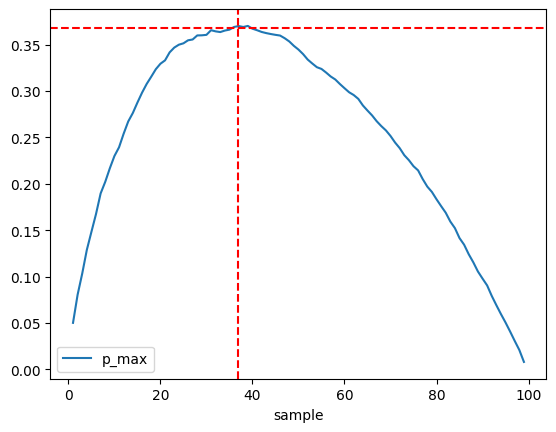

In [6]:
dfmax = df[df["fraction_best"] == 1.0]
dfpmax = dfmax.groupby("sample").size().reset_index()
dfpmax["p_max"] =  dfpmax[0]/trials
ax = dfpmax.plot(x="sample", y="p_max")
ax.axvline(x=100./np.e, color="red", linestyle="--")
ax.axhline(y=1./np.e, color="red", linestyle="--")

### Interpretation:

- **Red dashed lines** mark the theoretical optimum:
  - **Vertical line at N/e ≈ 37**: The optimal number of candidates to reject (sample size)
  - **Horizontal line at 1/e ≈ 37%**: The maximum achievable probability of success
  
- **Peak Performance**: The curve reaches its maximum around sample size 37, confirming the theoretical prediction
- **Too Few Samples**: If you reject too few candidates (left side), you don't have enough information to identify quality
- **Too Many Samples**: If you reject too many candidates (right side), the best candidate may have already passed

This demonstrates that the optimal strategy is to **reject approximately the first 37%** of candidates, then select the next one who's better than all previous ones.

## Plot 1: Probability of Selecting the Best Candidate

This plot shows the **probability of successfully selecting the best candidate** as a function of the sample size (number of candidates rejected in the sampling phase).

In [7]:
dfgb = df.groupby("sample").mean().reset_index()
dfgb

,sample,index,quality,best,fraction_best
0,1.0,5.360000,0.875912,2.509849,0.355232
1,2.0,9.573125,1.181773,2.509849,0.479320
2,3.0,13.282500,1.348491,2.509849,0.546402
3,4.0,16.563000,1.464223,2.509849,0.592812
4,5.0,19.892500,1.538433,2.509849,0.622292
...,...,...,...,...,...
94,95.0,98.890875,0.123410,2.509849,0.047796
95,96.0,98.932125,0.097154,2.509849,0.037062
96,97.0,98.966500,0.067463,2.509849,0.025487
97,98.0,98.987125,0.043178,2.509849,0.015553


<Axes: xlabel='sample'>

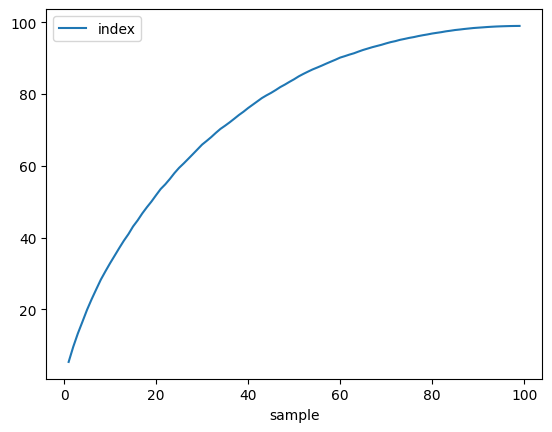

In [8]:
dfgb.plot(x="sample", y="index")

### Interpretation:

- **X-axis**: Sample size (number of candidates rejected before selecting)
- **Y-axis**: Average position where selection occurs (1-100)

**Key Observations:**
- **Small sample sizes**: When you reject few candidates (left), you select early (low index) because you quickly find someone better than the small sample
- **Large sample sizes**: When you reject many candidates (right), you're forced to select later (high index) or reach the end
- **Optimal region (around 37)**: Balances between having enough information and having enough remaining candidates

The curve shows that with the optimal strategy, you typically select around position 75 on average, giving you plenty of candidates to evaluate while still having options remaining.

## Plot 2: Average Position of Selected Candidate

This plot shows the **average position (index)** of the candidate selected using each sample size strategy.

<Axes: xlabel='sample'>

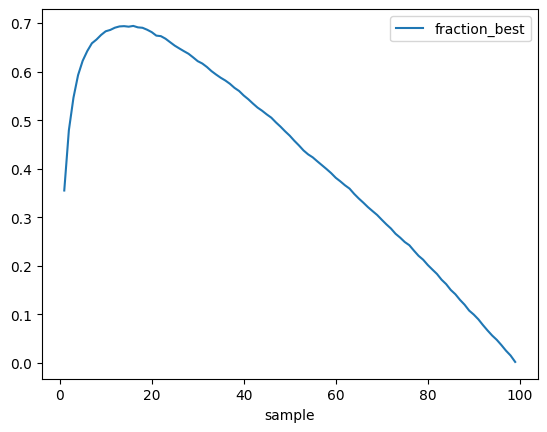

In [9]:
dfgb.plot(x="sample", y="fraction_best")

### Interpretation:

- **Y-axis value of 1.0** means you selected the absolute best candidate
- **Y-axis value < 1.0** means you selected a good but not optimal candidate

**Key Observations:**
- The curve has a similar shape to Plot 1, peaking around the optimal sample size of 37
- **Peak around 0.62-0.65**: Even with the optimal strategy, on average you get a candidate whose quality is about 62-65% of the best
- **This differs from Plot 1**: Plot 1 shows the probability of getting exactly the best (binary success), while this plot shows the average quality of whoever you select

**Why the difference?**
- In ~37% of cases, you get the best candidate (quality ratio = 1.0)
- In ~63% of cases, you get a suboptimal candidate (quality ratio < 1.0)
- The average across all cases is around 0.62-0.65

This demonstrates that even when you don't select the absolute best candidate, the optimal strategy still tends to select high-quality candidates on average.

## Plot 3: Average Quality Ratio of Selected Candidate

This plot shows the **average quality ratio** (selected candidate's quality / best candidate's quality) as a function of sample size.